<a href="https://colab.research.google.com/github/jonasmanundo/ISYS5002-2023-S1/blob/main/05_3_stocks_daily_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module CSV

### Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values. 

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format. 

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases. 

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values. 

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



**csv module** provides functions for working with CSV files

In [ ]:
#Writing to a CSV file

#import csv module
import csv

#open file and write records
with open("accounts.csv", 'w')  as accounts:
  writer = csv.writer(accounts)
  writer.writerow([100, 'Jones', 24.98])
  writer.writerow([200, 'Doe', 345.67])
  writer.writerow([300, 'Williams', 0.00])
  writer.writerow([400, 'Stone', -42.16])
  writer.writerow([500, 'Rich', 224.62])


In [ ]:
#reading from CSV file
#The csv module’s reader function returns an object that reads CSV-format data from the specified file object

#open file and read records
import csv

#open file and write records
with open("accounts.csv", 'r')  as accounts:
  reader = csv.reader(accounts)
  print(f'{"Accounts":10}{"Name":10}{"Balance":8}')
  for record in reader:
    accountid, name, balance = record
    #print(record)
    #print(accountid, name, balance)
    print(f'{accountid:10}{name:10}{balance:8}')


Accounts  Name      Balance 
100       Jones     24.98   
200       Doe       345.67  
300       Williams  0.0     
400       Stone     -42.16  
500       Rich      224.62  


## Working with large CSV file

In [5]:
#curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1653004800&period2=1661040000&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv
curl "https://query1.finance.yahoo.com/v7/finance/download/BHP?period1=1679443200&period2=1680048000&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

SyntaxError: ignored

In [8]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP?period1=1679443200&period2=1680048000&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   386  100   386    0     0   5146      0 --:--:-- --:--:-- --:--:--  5216


In [9]:
import csv

#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2023-03-22', '58.689999', '58.810001', '57.500000', '57.529999', '57.529999', '3074600']
['2023-03-23', '58.180000', '58.610001', '57.220001', '57.610001', '57.610001', '2404500']


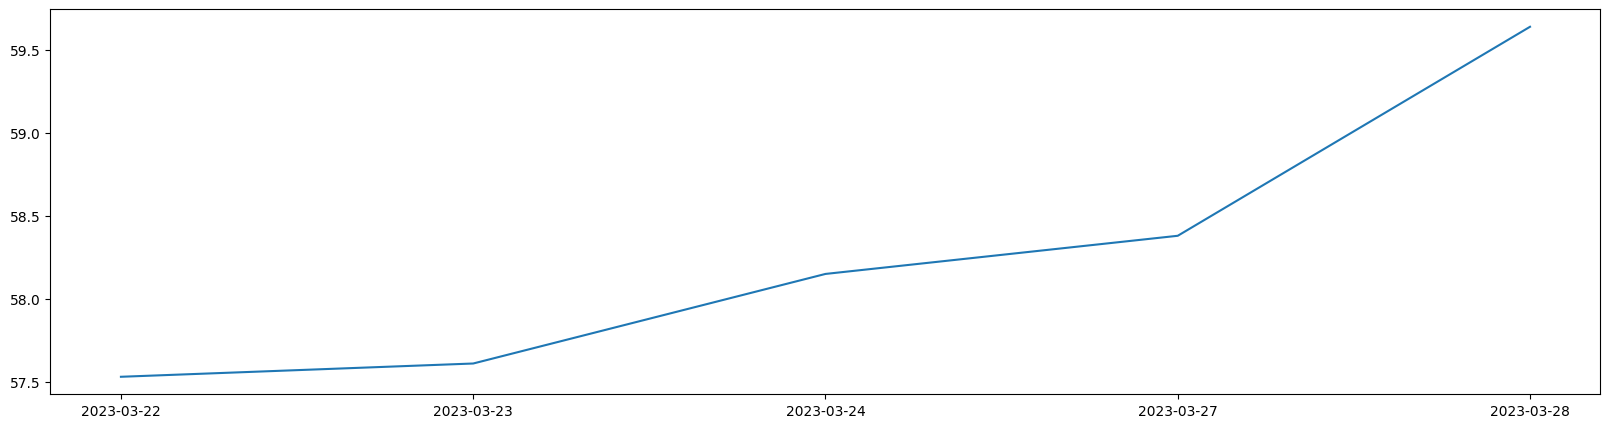

In [11]:
import csv

date = []
close = []
c = 0
#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  header = next(reader, None) #get the headers
  #print(header)
  for record in reader:
    date.append(record[0])
    close.append(float(record[5]))

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)


# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier 

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data

 
Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [18]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP?period1=1648598400&period2=1680048000&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17292    0 17292    0     0   144k      0 --:--:-- --:--:-- --:--:--  144k


In [26]:
#import pandas module
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
df = pd.read_csv('BHPData.csv')

print(df.tail())
df.info()
df.describe()

df1 = df[['Date', 'Close']]
df1





           Date       Open       High        Low      Close  Adj Close  \
245  2023-03-22  58.689999  58.810001  57.500000  57.529999  57.529999   
246  2023-03-23  58.180000  58.610001  57.220001  57.610001  57.610001   
247  2023-03-24  57.889999  58.270000  57.669998  58.150002  58.150002   
248  2023-03-27  58.240002  58.549999  57.860001  58.380001  58.380001   
249  2023-03-28  59.570000  59.750000  59.290001  59.639999  59.639999   

      Volume  
245  3074600  
246  2404500  
247  2498800  
248  1952300  
249  1871300  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
d

,Date,Close
0,2022-03-30,69.687782
1,2022-03-31,68.911690
2,2022-04-01,70.740410
3,2022-04-04,70.276543
4,2022-04-05,68.849243
...,...,...
245,2023-03-22,57.529999
246,2023-03-23,57.610001
247,2023-03-24,58.150002
248,2023-03-27,58.380001


## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

Sources:

*Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

*Tony Gaddis, Starting out with Python, 5th Edition*

*Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition*
